# 01-wordvecs1

## 如何表征单词

### 1.建立词典例如：
WordNet:包含同义词集和超限词列表的同义词词典(“是”关系)。

In [1]:
from nltk.corpus import wordnet as wn

poses = { 'n':'noun', 'v':'verb', 's':'adj (s)', 'a':'adj', 'r':'adv'}
for synset in wn.synsets("good"):
    print("{}: {}".format(poses[synset.pos()],", ".join([l.name() for l in synset.lemmas()])))

noun: good
noun: good, goodness
noun: good, goodness
noun: commodity, trade_good, good
adj: good
adj (s): full, good
adj: good
adj (s): estimable, good, honorable, respectable
adj (s): beneficial, good
adj (s): good
adj (s): good, just, upright
adj (s): adept, expert, good, practiced, proficient, skillful, skilful
adj (s): good
adj (s): dear, good, near
adj (s): dependable, good, safe, secure
adj (s): good, right, ripe
adj (s): good, well
adj (s): effective, good, in_effect, in_force
adj (s): good
adj (s): good, serious
adj (s): good, sound
adj (s): good, salutary
adj (s): good, honest
adj (s): good, undecomposed, unspoiled, unspoilt
adj (s): good
adv: well, good
adv: thoroughly, soundly, good


In [2]:
from nltk.corpus import wordnet as wn

panda = wn.synset("panda.n.01")
hyper = lambda s: s.hypernyms()
list(panda.closure(hyper))

[Synset('procyonid.n.01'),
 Synset('carnivore.n.01'),
 Synset('placental.n.01'),
 Synset('mammal.n.01'),
 Synset('vertebrate.n.01'),
 Synset('chordate.n.01'),
 Synset('animal.n.01'),
 Synset('organism.n.01'),
 Synset('living_thing.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

WordNet的缺点
- 细节缺失
- 无法更新
- 太过主观
- 人工劳动
- 无法计算单词的相似度

### 2.用离散符号表示单词
例如：one-hot编码：向量的维度等于单词的数量（每个维代表一个单词是否出现）

motel = [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]

hotel = [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]

one-hot的缺点

- 维度太高

- 无法计算相似度

### 3.用语境来表达单词

一个词的意思是由那些经常出现在旁边的词给出的。

文本中的w,他的**context**是这个w周围出现的词的集合（固定窗口大小）。我们可以用很多不同句子中的**context**去表征这个词w。

举例：
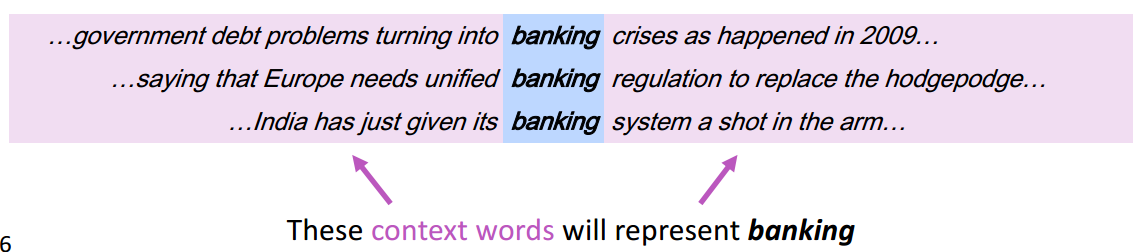

#### Word vectors

我们将为每个单词构建一个密集向量，使其与出现在类似上下文中的单词向量相似。
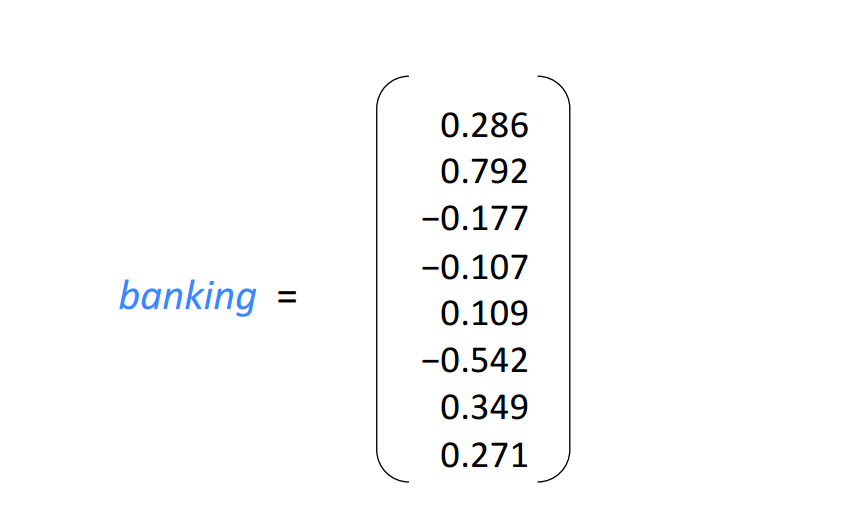
**Note*: word vectors有时也被称为word embeddings或者word representations.他是一种distributed representation（分布式表示法）.

#### 这种表示法的可视化
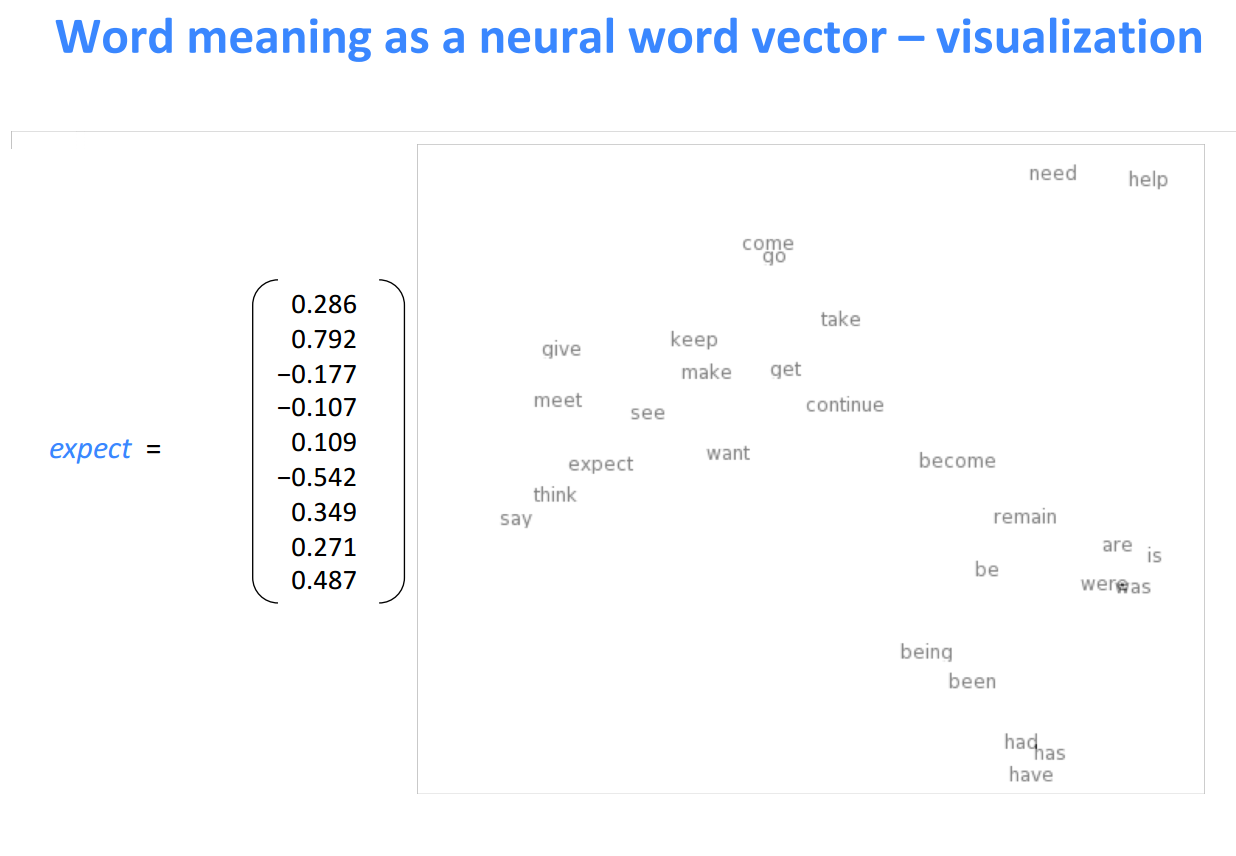

## Word2vec: 概述

Word2vec是一个学习**词向量(word vectors)**的框架

主要想法
- 大量的可用文本
- 每个单词由一个固定长度的向量来表示
- 遍历可用文本的每个位置t，分为**center word（中心词）** c 和 **context words(上下文词) ** o
- 利用c和o**词向量**的相似度计算给出c时出现o的概率（或者相反）
- 调整**词向量**最大化这个概率

如图：

step1：
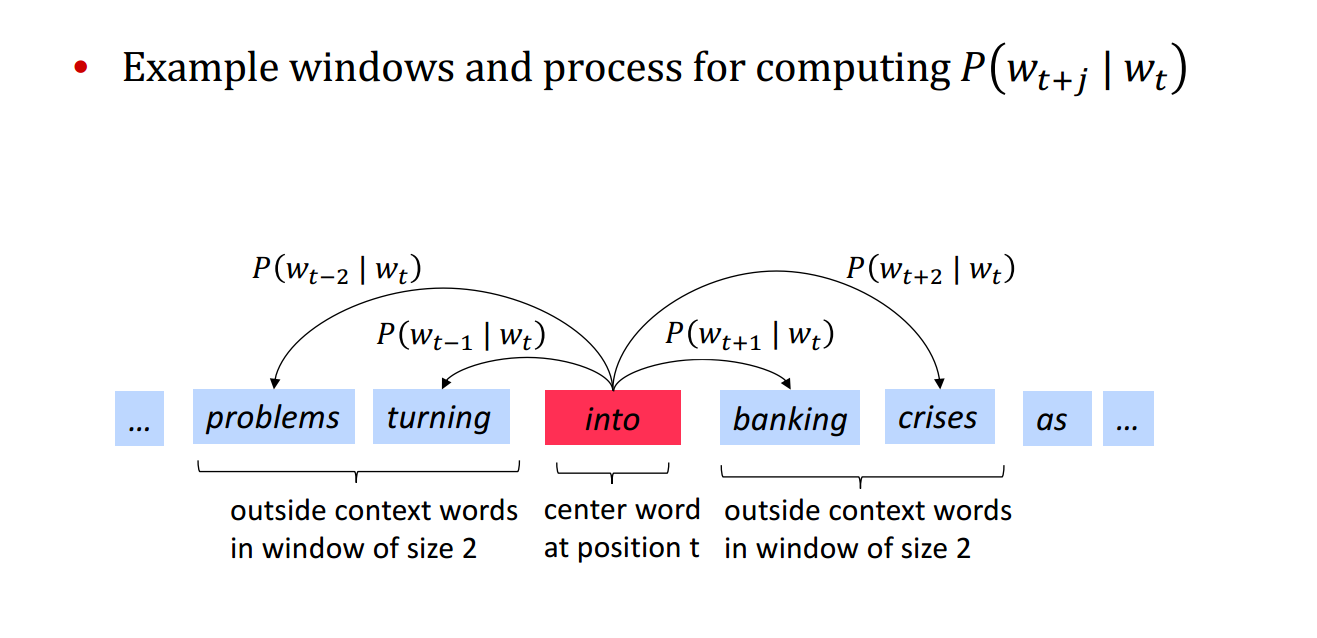

step2：
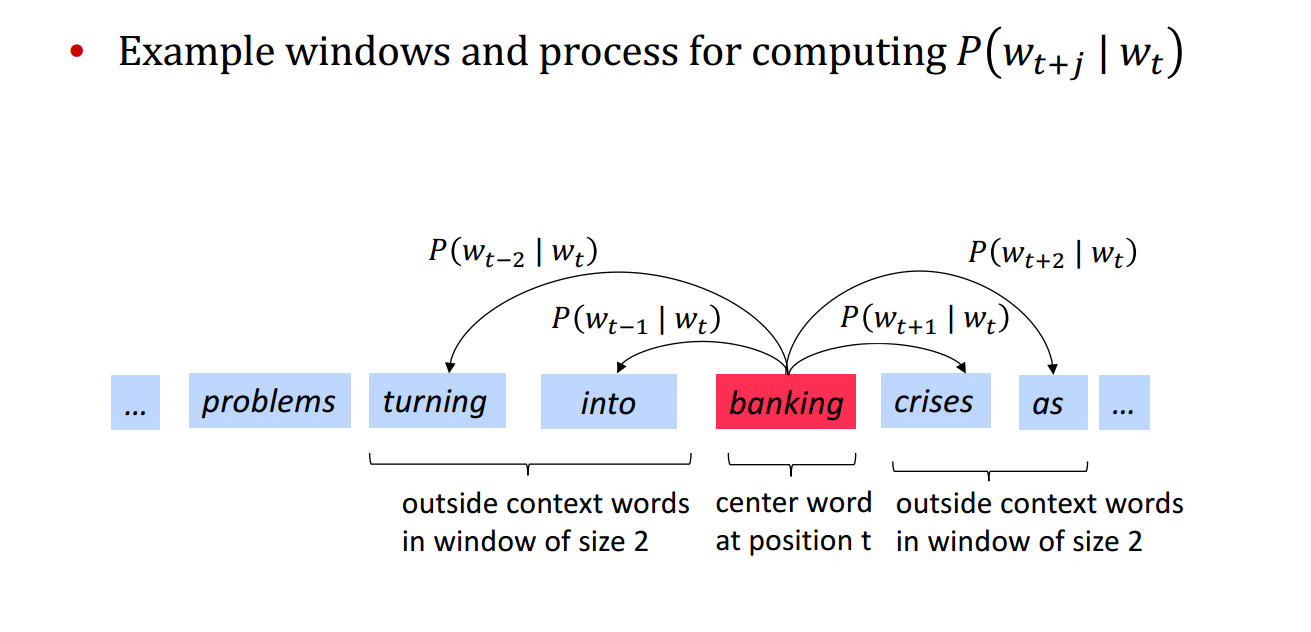

### Word2vec: 目标函数
文本中的每个位置$t = 1...T.$对固定窗口大小为m的**context words**进行预测，假设**conter word**是$w_j.$

$Likelihood = L(\theta) = \prod_{t = 1}^{T}\prod_{-m<=j<=m  j\neq0}P(w_{t+j}|w_j;\theta)$
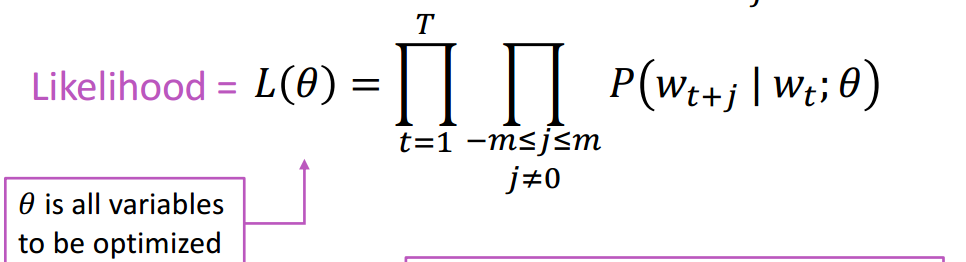

**Note：$\theta$*是所需要优化的所有参数 

目标函数（损失函数）$J(\theta)$是负对数似然的均值：
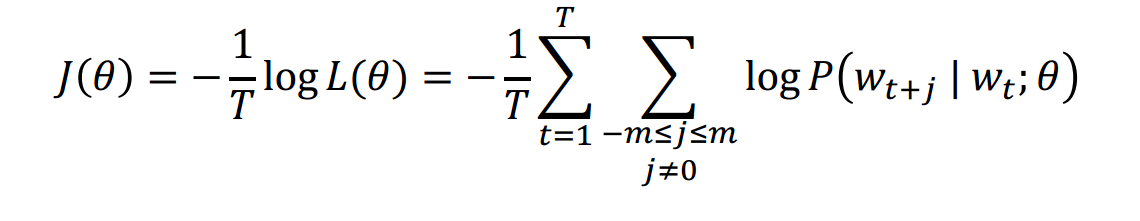
最小化目标函数 = 最大化预测正确率

**问**：如何计算$P(w_{t+j}|w_t;\theta)$?

**答**：
每个词$w$用两个向量表示
- 当$w$是中心词时用$v_w$表示$w$
- 当$w$是上下文词时用$u_w$表示$w$
- 然后中心词c和上下文词o有：
$
P(o|c) = \frac{exp(u_{o}^{T}v_c)} {\sum_{w\in V}exp(u_{w}^{T}v_c)}
$

仍然是上方图片中的数据举例：假设$P(u_{problems}|v_{into}) 是P(problems | into;u_{problems},v_{into},\theta) 的缩写$
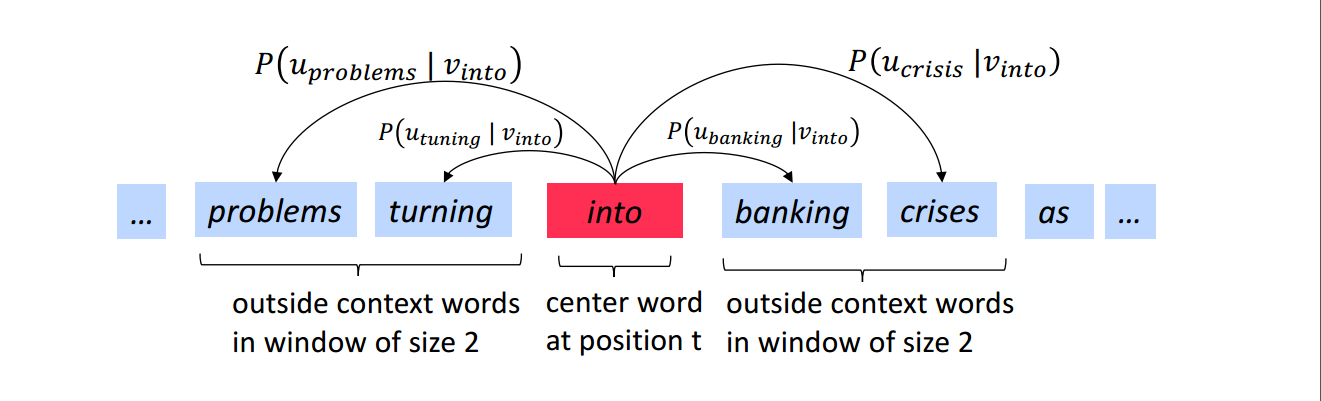

其中：
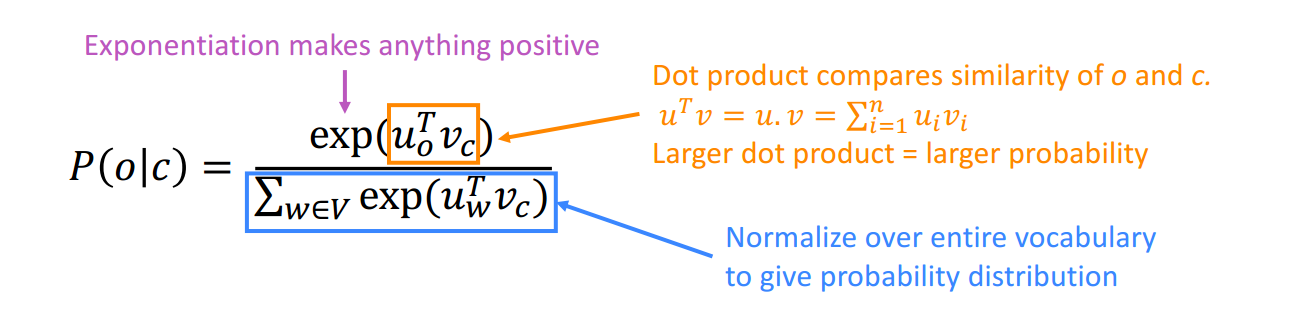


**疑问**：上式中的$W$和$V$分别指什么？

**答**：$w$应该是窗口，$v$应该是整个词库，也就是整个文本

**`softmax function `**函数$ℝ^n → ℝ^n$

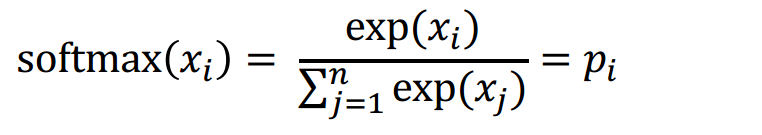
`softmax function `函数把一个任意值映射为一个概率分布：
- “max”放大了最大值$x_i$的概率

- “soft”仍然将一些概率分配给较小值

- 在深度学习中经常使用

### 通过训练模型优化参数
通过训练模型，调整参数最小化损失函数
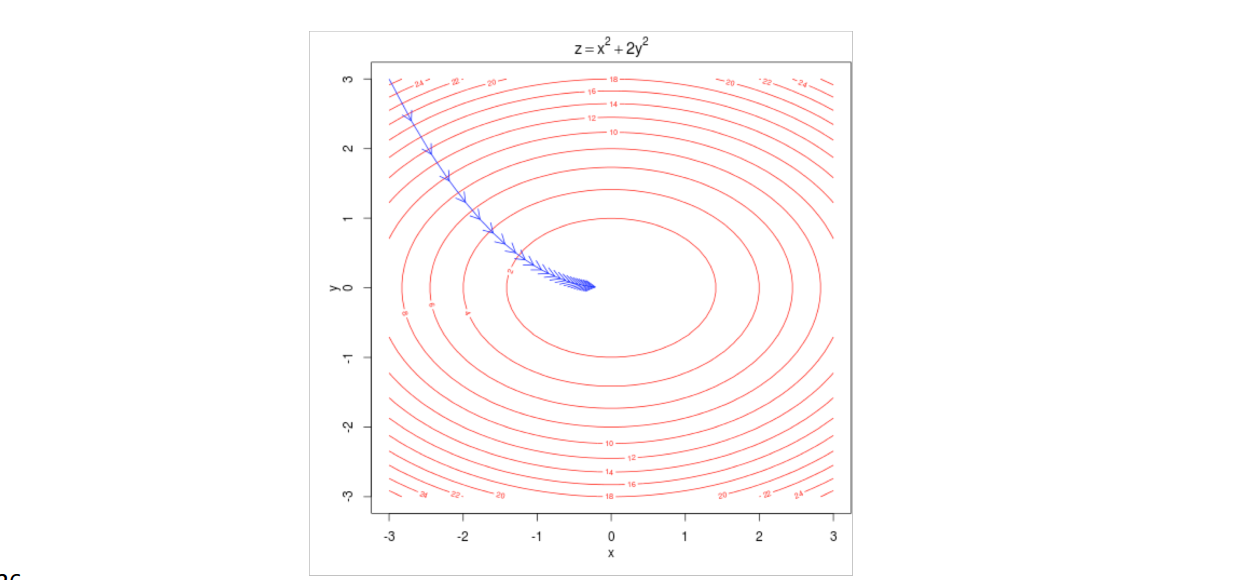

#### 计算所有向量的梯度
- $\theta$ 代表了模型中所有的参数，$\theta$ 是一个向量

- 在我们的案例中,每个单词有两种向量（中心、上下文时各一个），每个向量是d维，一共有V个词汇。

- 通过梯度下降法优化参数

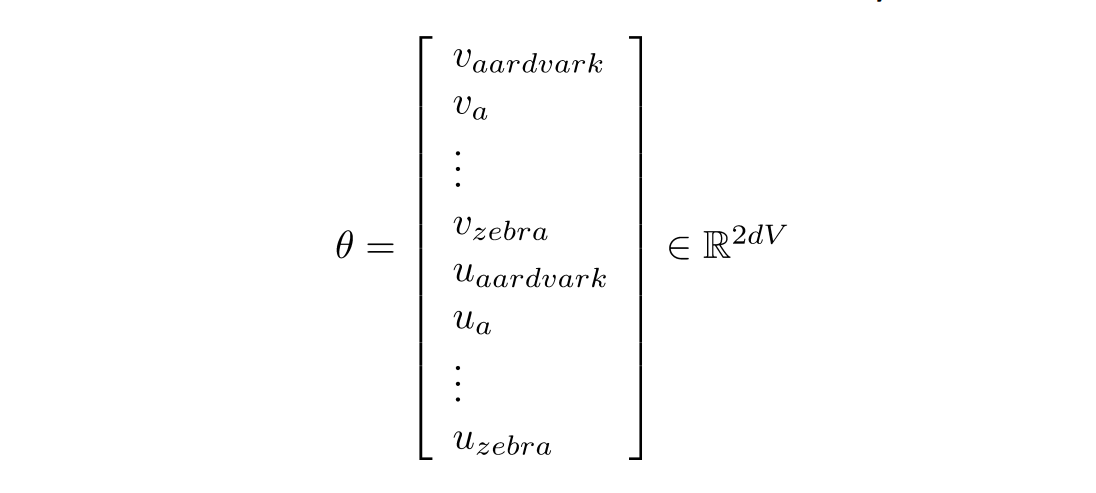


### 梯度
基础知识：
- 偏导求解
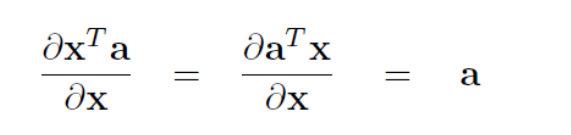

- 链式法则，若有$y = f(u)$并且$u = g(x)$,即$y = f(g(x))$,则有：

### $\frac {dy}{dx} = \frac {dy}{du} \frac {du}{dx} = \frac {df(u)}{du} \frac {dg(x)}{dx}$

#### 例如：

$\frac {dy}{dx} = \frac {5(x^3+7)^4}{dx}$

- $y = f(u) = u^4$

- $u = g(x) = x^3 + 7$

- $\frac {dy}{dx} = 20(x^3+7)*3x^2$

### 计算
目标函数：
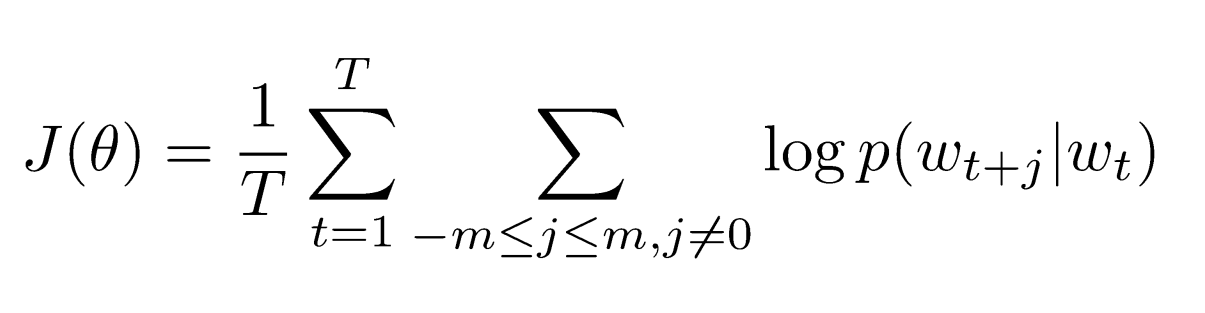

#### 导出中心词的梯度：
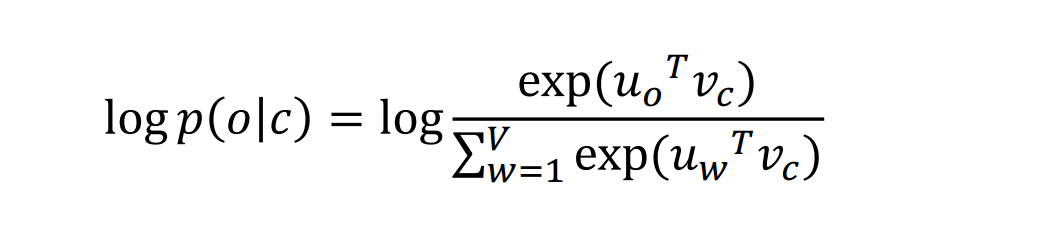

#### 计算所有的梯度
- 我们计算除了一个窗口中每个中心向量v的梯度

- 我们还需要导出的外部向量u的梯度！

- 更新该窗口中的参数

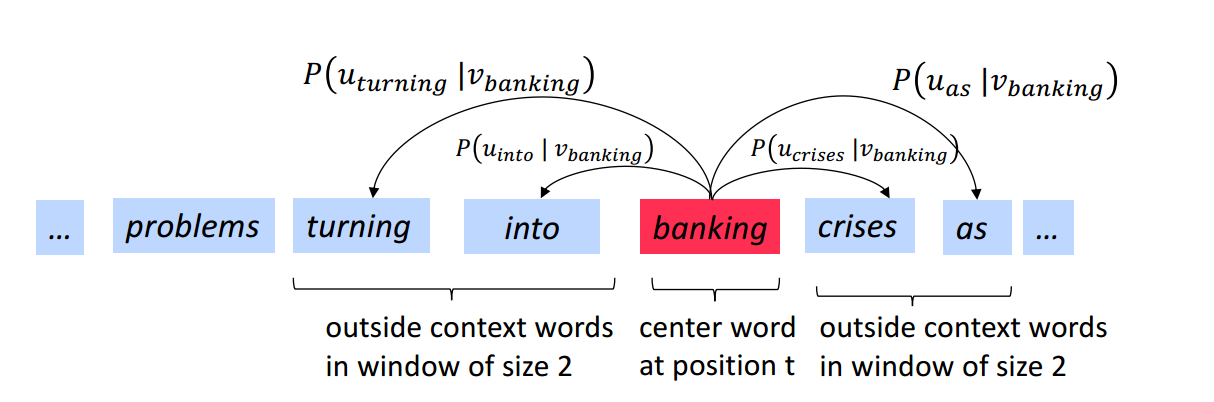

### 更多细节
每个单词为什么需要两个向量？---> 易于优化
两个变种：
- 1. Skip-grams (SG)：给定中心词预测上下文词
- 2. Continuous Bag of Words (CBOW)：给定上下文预测中心词

我们上面的图片案例用的一直是SG模型

效率提升：
- 1. 负采样（Negative sampling）

上面采用的是朴素的`softmax`

## 优化：梯度下降
- 目标函数：$J(\theta)$
- 梯度下降法是一种最优化$J(\theta)的算法$
- 思路：根据当前的参数\theta,计算$J(\theta)$的梯度，然后向负梯度方向移动一小步，不断的重复，直到达到优化目的。
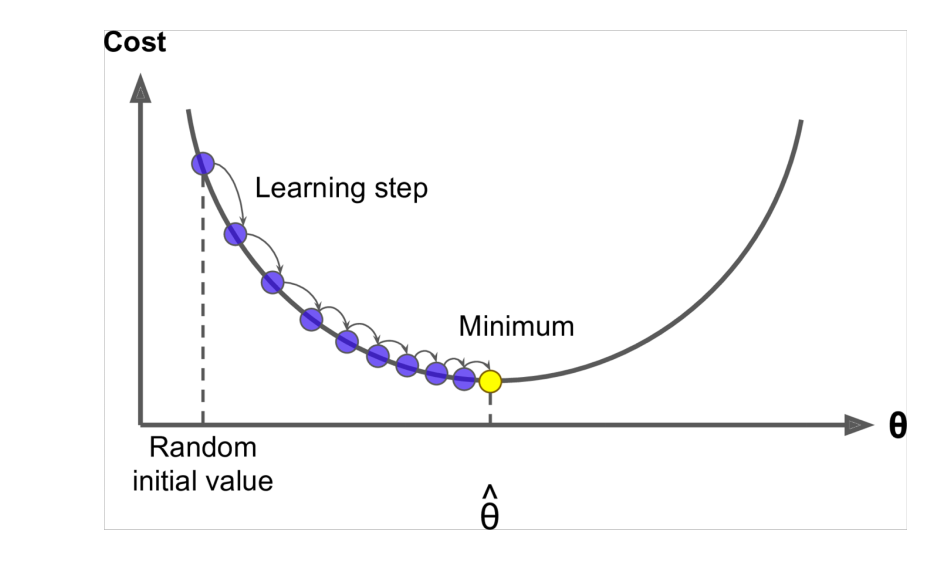

- 逐步更新
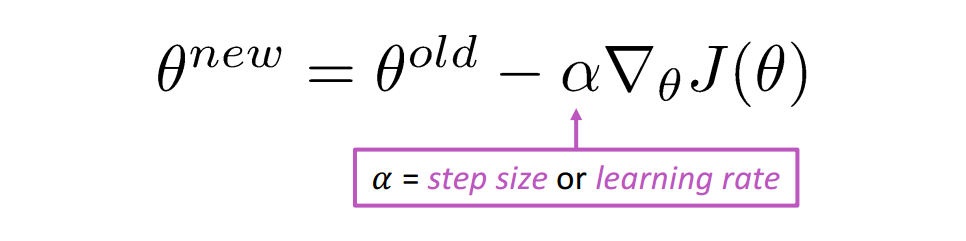

- 对于一个参数时：
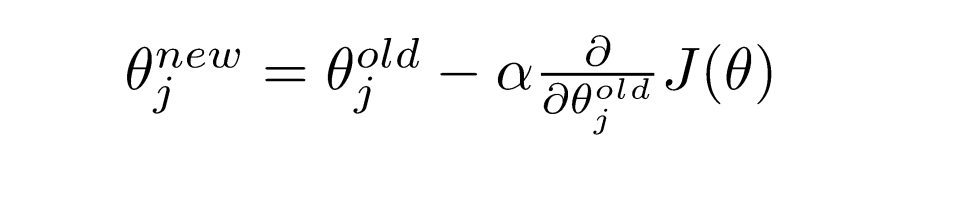

#### 算法
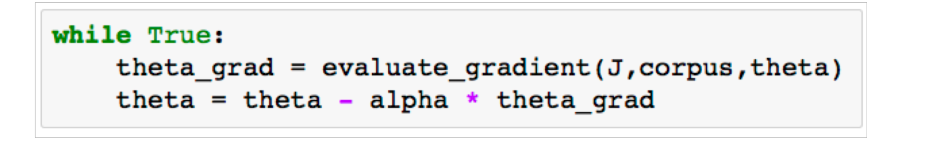

### 随机梯度下降法
问题：$J(\theta)$是代表所有窗口的函数。
- 因此，计算$J(\theta)$的导数非常的复杂。因此每次更新都要等好久。对于神经网络的运算十分不友好。

解决：Stochastic gradient descent (SGD)

#### 算法：
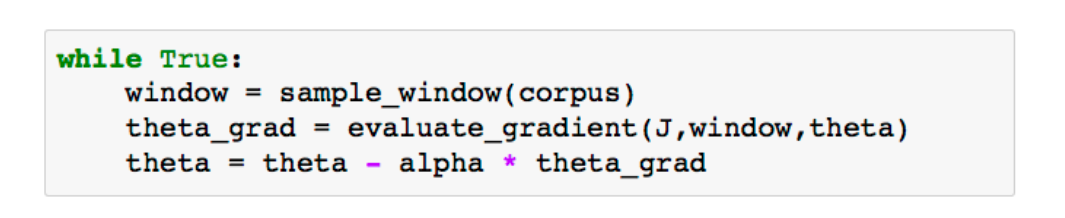